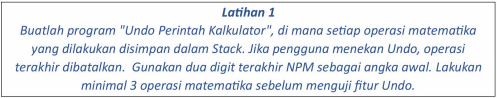

In [ ]:
# Class
class CalculatorStack:
  def __init__(self):
    self.last_result = None
    self.stack = ["0"]

  def __iter__(self):
    for v in self.stack:
      yield v

  def __repr__(self):
    return str(self.stack)

  def push(self, new_data):
    try:
      if self.last_result is None:
        self.stack.append(new_data)
        self.last_result = eval(new_data)
      else:
        self.stack.append(f"{str(self.last_result)}{new_data}")
        self.last_result = eval(f"{str(self.last_result)}{new_data}")
    except:
      print("Kesalahan dalam menginput operasi matematika")

  def undo(self):
    if len(self.stack) == 0:
      return

    self.stack.pop()

    if len(self.stack) == 0:
      return

    self.last_result = eval(self.stack[-1])


# Variabel
operations_history = CalculatorStack()
is_first = True


# Program utama
print("Ketik \"stop\" untuk menghentikan kalkulator\n")

while True:
  input_text = "Masukkan operasi matematika:\n"

  if not is_first:
    input_text = f"Lanjutkan operasi matematika:\n{operations_history.last_result} "

  user_input = input(input_text).lower()

  if user_input == "stop":
    break
  elif user_input == "undo":
    operations_history.undo()
    print("")
  else:
    operations_history.push(user_input)
    print(f"= {operations_history.last_result}\n")
  is_first = False

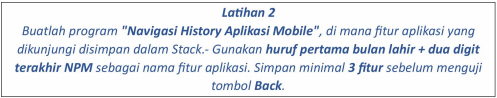

In [ ]:
# Variabel
features = [
    "File",
    "Edit",
    "View",
    "Insert",
    "Runtime",
    "Tools",
    "Help"
]

# Class
class History:
  def __init__(self):
    self.current = ""
    self.stack = []
    self.commands = {
        "visit": self.visit,
        "back": self.back,
        "view": self.view
    }

  def __iter__(self):
    for v in self.stack:
      yield v

  def __repr__(self):
    return str(self.stack)

  def visit(self, new_data):
    if not new_data.title() in features:
      return

    self.stack.append(new_data)
    self.current = self.stack[-1]

  def back(self):
    if len(self.stack) == 0:
      return

    self.stack.pop()

    if len(self.stack) == 0:
      return

    self.current = self.stack[-1]

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      return

    command_to_execute = self.commands[splitted[0]]

    if not command_to_execute:
      return

    if len(splitted) > 1:
      splitted.pop(0)
      command_to_execute(" ".join(splitted))
    else:
      command_to_execute()

  def view(self):
    print(self.stack)


# Program utama
navigator = History()

print("Fitur yang tersedia:")

for v in features:
  print(f"- {v}")

print("""
Daftar perintah:
\033[92mvisit\033[0m \033[96m<directory>\033[0m - Kunjungi fitur dalam aplikasi
\033[92mback\033[0m - Kembali ke fitur yang telah dikunjungi sebelumnya
\033[92mview\033[0m - Lihat seluruh isi history fitur
\033[92mstop\033[0m - Hentikan program
""")

while True:
  user_input = input()

  if user_input == "stop":
    break
  else:
    navigator.execute(user_input)

  print(f"Saat ini berada di: {navigator.current}\n")

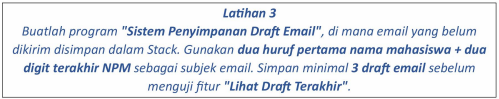

In [ ]:
# Class
class Email:
  def __init__(self, recipient, subject, body):
    self.recipient = recipient
    self.subject = subject
    self.body = body

  def stringify(self):
    return f"{'=' * 25}\nTo:\n{self.recipient}\n\nSubject:\n{self.subject}\n\nBody:\n{self.body}\n{'=' * 25}"


class Draft:
  def __init__(self):
    self.stack = []
    self.commands = {
        "write": self.write_email,
        "show": self.show
    }

  def __iter__(self):
    for v in self.stack:
      yield v

  def __repr__(self):
    return str(self.stack)

  def push(self, new_data):
    self.stack.append(new_data)

  def pop(self):
    if len(self.stack) == 0:
      return
    return self.stack.pop()

  def show(self):
    if len(self.stack) == 0:
      return
    counter = 0
    print("Isi draft:\n")
    for v in self:
      counter = counter + 1
      print(f"[ Email ke-{counter} ]\n{v.stringify()}\n\n")

  def write_email(self):
    new_email = Email(input("To\t\t: "), input("Subject\t\t: "), input("Body\t\t: "))
    self.push(new_email)
    print("")

  def execute(self, command):
    command_to_execute = self.commands[command]

    if not command_to_execute:
      return

    command_to_execute()


# Program utama
draft = Draft()

print("""Daftar perintah:
\033[92mwrite\033[0m - Tulis email
\033[92mshow\033[0m - Lihat draft email
\033[92mstop\033[0m - Hentikan program
""")

while True:
  user_input = input()

  if user_input == "stop":
    break
  else:
    draft.execute(user_input)

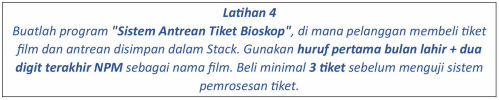

In [ ]:
# Variabel
last_id = 0
movies = [
    "N43",
    "N43 2",
    "N43 - The End?"
]

# Class
class Ticket:
  def __init__(self, movie_name):
    global last_id
    self.id = last_id
    self.movie_name = movie_name
    last_id = last_id + 1

class TicketHandler:
  def __init__(self):
    self.tickets = []
    self.commands = {
        "buy": self.add_ticket,
        "process": self.process_ticket,
        "view": self.view
    }

  def __iter__(self):
    for v in self.tickets:
      yield v

  def __repr__(self):
    temp = ""
    for v in self:
      temp = f"{temp}Tiket {v.id}, film: {v.movie_name}\n"
    return temp

  def add_ticket(self, movie_name):
    if movie_name.title() not in movies:
      print(f"Film berjudul \"{movie_name}\" tidak ditemukan\n")
      return

    new_ticket = Ticket(movie_name)
    self.tickets.append(new_ticket)
    print(f"Membeli tiket untuk film \"{movie_name}\"\n")

  def process_ticket(self):
    if len(self.tickets) == 0:
      print("Antrean tiket kosong\n")
      return

    current_ticket = self.tickets[len(self.tickets) - 1]
    print(f"Memproses tiket {current_ticket.id}, film: {current_ticket.movie_name}\n")
    self.tickets.pop()

  def view(self):
    print(f"{self}")

  def execute(self, command):
    splitted = command.split(" ")

    if len(splitted) == 0:
      return

    command_to_execute = self.commands[splitted[0]]

    if not command_to_execute:
      return

    if len(splitted) > 1:
      splitted.pop(0)
      command_to_execute(" ".join(splitted))
    else:
      command_to_execute()


# Program utama
handler = TicketHandler()


print("""Daftar perintah:
\033[92mbuy\033[0m \033[96m<nama film>\033[0m - Beli tiket
\033[92mprocess\033[0m - Proses tiket terakhir
\033[92mview\033[0m - Lihat seluruh tiket yang belum diproses
\033[92mstop\033[0m - Hentikan program
""")


while True:
  user_input = input()

  if user_input == "stop":
    break

  handler.execute(user_input)